# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from requests.utils import requote_uri
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
fill_url = requests.utils.requote_uri
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
print()
print(f"Total number of cities: {total_cities}")


Total number of cities: 621


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Set variables needed for analysis
city_weather = []
cou = []
lat = []
long = []
temp = []
humid = []
cloud = []
wind = []
city_num = 1
city_set = 1 

# Language to show processing
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

# Pull data to create dataframe
for city in cities:
    try:
        final_url = fill_url(query_url + city)
#         print(final_url)
        response = requests.get(final_url).json()
#         print(response)
        city_weather.append(response['name'])
        cou.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])

        print(f"Processing Record {city_num} of set {city_set} | {city}")
        
        # Add one to city count
        city_num += 1 
    
    except (KeyError):
        print("City not found....Skipping............")
        
    #Create sets of 50
    if city_num == 51:
        city_set += 1
        city_num = 1

print('''
-----------------------------
Data Retrieval Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | bluff
Processing Record 2 of set 1 | ushuaia
Processing Record 3 of set 1 | tumalim
Processing Record 4 of set 1 | rikitea
Processing Record 5 of set 1 | lashma
Processing Record 6 of set 1 | mataura
City not found....Skipping............
Processing Record 7 of set 1 | norman wells
Processing Record 8 of set 1 | emba
City not found....Skipping............
Processing Record 9 of set 1 | busselton
Processing Record 10 of set 1 | bredasdorp
Processing Record 11 of set 1 | bandarbeyla
Processing Record 12 of set 1 | lavrentiya
Processing Record 13 of set 1 | leeton
Processing Record 14 of set 1 | provideniya
Processing Record 15 of set 1 | albany
Processing Record 16 of set 1 | tasiilaq
Processing Record 17 of set 1 | butaritari
Processing Record 18 of set 1 | mikhaylovka
Processing Record 19 of set 1 | port alfred
Processing Record 20 of set 1 | vao
Processing Record 21 of 

Processing Record 31 of set 4 | homer
Processing Record 32 of set 4 | laurencekirk
Processing Record 33 of set 4 | fairbanks
Processing Record 34 of set 4 | zemes
City not found....Skipping............
Processing Record 35 of set 4 | miri
Processing Record 36 of set 4 | baykit
Processing Record 37 of set 4 | batagay-alyta
Processing Record 38 of set 4 | kaitangata
Processing Record 39 of set 4 | hastings
Processing Record 40 of set 4 | cherskiy
Processing Record 41 of set 4 | kirakira
Processing Record 42 of set 4 | khandyga
Processing Record 43 of set 4 | raudeberg
Processing Record 44 of set 4 | nhulunbuy
Processing Record 45 of set 4 | guerrero negro
Processing Record 46 of set 4 | orange walk
Processing Record 47 of set 4 | hirara
Processing Record 48 of set 4 | tilichiki
Processing Record 49 of set 4 | ribeira grande
Processing Record 50 of set 4 | lagoa
Processing Record 1 of set 5 | kushima
Processing Record 2 of set 5 | kahului
Processing Record 3 of set 5 | camacupa
Processing

Processing Record 14 of set 8 | cabo san lucas
Processing Record 15 of set 8 | marawi
Processing Record 16 of set 8 | ust-ilimsk
Processing Record 17 of set 8 | nabire
City not found....Skipping............
Processing Record 18 of set 8 | talcahuano
Processing Record 19 of set 8 | ariquemes
Processing Record 20 of set 8 | korla
Processing Record 21 of set 8 | ngunguru
Processing Record 22 of set 8 | peterhead
Processing Record 23 of set 8 | eravur
Processing Record 24 of set 8 | lubao
Processing Record 25 of set 8 | san cristobal
Processing Record 26 of set 8 | devonport
Processing Record 27 of set 8 | tiznit
Processing Record 28 of set 8 | jackson
Processing Record 29 of set 8 | hirado
Processing Record 30 of set 8 | urucara
Processing Record 31 of set 8 | vila velha
Processing Record 32 of set 8 | umm lajj
City not found....Skipping............
Processing Record 33 of set 8 | tineo
Processing Record 34 of set 8 | pilar
Processing Record 35 of set 8 | nanortalik
Processing Record 36 o

Processing Record 46 of set 11 | divnogorsk
Processing Record 47 of set 11 | jiblah
Processing Record 48 of set 11 | pringsewu
Processing Record 49 of set 11 | lima
Processing Record 50 of set 11 | pindiga
Processing Record 1 of set 12 | orlik
Processing Record 2 of set 12 | namatanai
Processing Record 3 of set 12 | lazdijai
Processing Record 4 of set 12 | tonantins
Processing Record 5 of set 12 | muravlenko
Processing Record 6 of set 12 | kemi
City not found....Skipping............
Processing Record 7 of set 12 | oranjemund
Processing Record 8 of set 12 | biak
Processing Record 9 of set 12 | shizunai
Processing Record 10 of set 12 | havre-saint-pierre
Processing Record 11 of set 12 | lipari
Processing Record 12 of set 12 | sarvar
Processing Record 13 of set 12 | abu samrah
Processing Record 14 of set 12 | binga

-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary to hold all cities
weather_dict = {
    'City' : city_weather,
    'County' : cou, 
    'Latitude' : lat,
    'Longitude' : long,
    'Temperature' : temp,
    'Humidity' : humid,
    'Cloudiness' : cloud, 
    'Wind Speed': wind
}

# Convert to DataFrame
weather_data = pd.DataFrame(weather_dict)

#Export to CSV
weather_data.to_csv("Outputs/Weather_Data", index=False, header=True)

weather_data

,City,County,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,-46.6000,168.3333,12.24,92,100,12.91
1,Ushuaia,AR,-54.8000,-68.3000,20.00,52,0,3.68
2,Tumalim,PH,14.0801,120.7231,25.69,89,75,1.54
3,Rikitea,PF,-23.1203,-134.9692,25.60,75,50,4.06
4,Lashma,RU,54.9321,41.1438,-13.63,94,100,3.11
...,...,...,...,...,...,...,...,...
559,Havre-St-Pierre,CA,50.2334,-63.5986,-17.00,55,1,6.69
560,Lipari,IT,38.4674,14.9540,20.56,44,66,0.45
561,Sárvár,HU,47.2539,16.9352,2.21,100,90,2.06
562,Abu Samrah,SY,35.3029,37.1841,16.13,52,0,6.84


In [5]:
#Statistical summary
weather_data.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,20.192792,18.244390,10.026082,71.140071,51.102837,3.646330
std,33.453837,91.736326,18.965972,20.346987,39.210821,2.528504
min,-54.800000,-175.200000,-42.000000,4.000000,0.000000,0.190000
25%,-7.258875,-61.643600,-4.167500,62.000000,6.000000,1.790000
50%,23.647550,20.887250,16.770000,74.000000,54.000000,3.090000
75%,48.306575,99.952600,25.690000,87.000000,90.000000,4.822500
max,78.218600,178.416700,40.990000,100.000000,100.000000,15.380000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

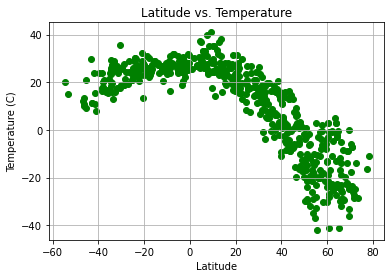

In [6]:
#Define variables
lat = weather_data['Latitude']
temp = weather_data['Temperature']

#Plot
plt.scatter(lat, temp, color='green')

#Lable
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Latitude vs. Temperature')
plt.grid('true')

#Save file as png
plt.savefig("Outputs/Latitude vs. Temperature.png")

The plot above shows how the temperature changes across the globe. Since we know the equator to be zero we can see that the highest temperatures are closest to zero and the temperature decreases as you move away from the equator, latitude 0.

### Latitude vs. Humidity Plot

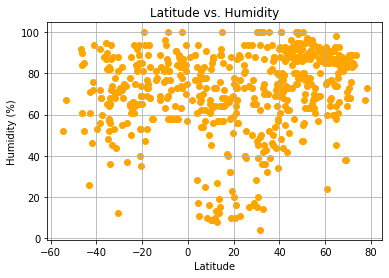

In [7]:
#Define new variables
humid = weather_data['Humidity']

#Plot
plt.scatter(lat, humid, color='orange')

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity')
plt.grid('true')

#Save file as png
plt.savefig("Outputs/Latitude vs. Humidity.png")

The plot above shows humidity levels across the globe. There does not seem to be a correlation between humidity and location.

### Latitude vs. Cloudiness Plot

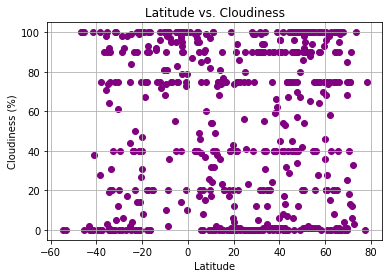

In [8]:
#Define new variables 
cloud = weather_data['Cloudiness']

#Plot
plt.scatter(lat, cloud, color='purple')

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness')
plt.grid('true')


#Save file as png
plt.savefig("Outputs/Latitude vs. Cloudiness.png")

The plot above shows percent cloudiness across the globe. There appears to be some consistency between some temperatures and cloudiness but more statistical tests are needed to established correlation.

### Latitude vs. Wind Speed Plot

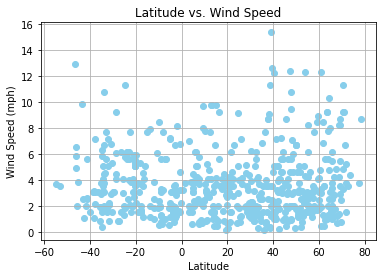

In [19]:
#Add new variables 
wind = weather_data['Wind Speed']

#Plot
plt.scatter(lat, wind, color='skyblue')

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed')
plt.grid('true')

#Save file as png
plt.savefig("Outputs/Latitude vs. Wind Speed.png")

The plot above shows the windspeed across the globe. In general, there seems to be few instances of extremely high wind speed as most speeds are clustered around the bottom of the plot.

## Linear Regression

In [10]:
#Establish north and south hemisphere dataframes

north = weather_data.loc[weather_data['Latitude'] >= 0]
north.head()
# print(len(north))
south = weather_data.loc[weather_data['Latitude'] < 0]
# print(len(south))

### Temperature vs. Latitude Linear Regression

####  Northern Hemisphere - Temperature vs. Latitude Linear Regression

The r-value is: 0.7810206432459412


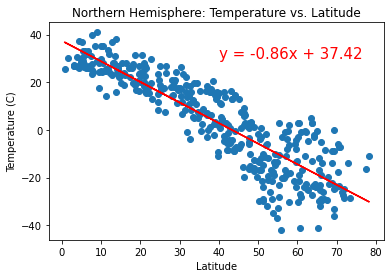

In [11]:
from scipy import stats

#Add associated y_axis
north_lat = north['Latitude']
north_temp = north['Temperature']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_temp)

# Get regression values
regress_values = north_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(north_lat, north_temp)
plt.plot(north_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Northern Hemisphere: Temperature vs. Latitude')
plt.annotate(lneq,(40,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Temperature vs. Latitude Linear Regression

The r-value is: 0.3254506514883708


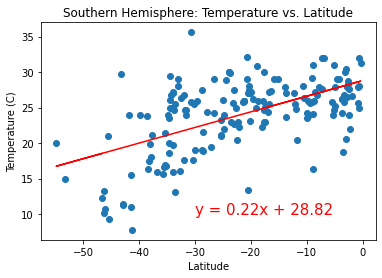

In [12]:
#Add associated y_axis
south_lat = south['Latitude']
south_temp = south['Temperature']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_temp)

# Get regression values
regress_values = south_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(south_lat, south_temp)
plt.plot(south_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.annotate(lneq,(-30, 10),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

When looking at temperature vs latitude in the Northern and Southern Hemispheres it is clear that the closer to the equator the higher the temperature. This is shown in the Northern Hemisphere as the temperature decreases as latitude moves further away from 0. This is shown in the Southern Hemisphere as the temperature increases as latitude moves closer to 0. 

## Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1303930291538063


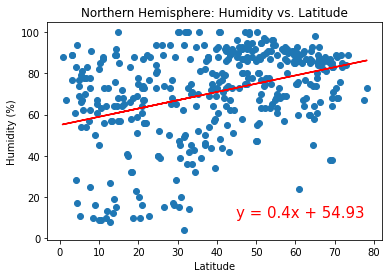

In [23]:
#Add associated y_axis
north_hum = north['Humidity']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_hum)

# Get regression values
regress_values = north_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(north_lat, north_hum)
plt.plot(north_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity vs. Latitude')
plt.annotate(lneq,(45,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.059188350222431504


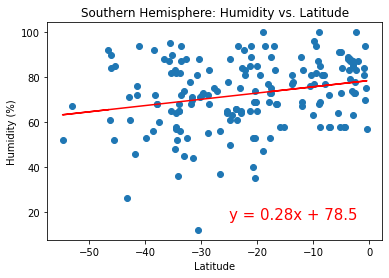

In [14]:
#Add associated y_axis
south_hum = south['Humidity']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_hum)

# Get regression values
regress_values = south_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(south_lat, south_hum)
plt.plot(south_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.annotate(lneq,(-25, 17),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

When looking at latitude and humidity there is very little correlation as noted by the low r values. However, it is interesting to note that most humidity across the world lingers, on average, above 50%. 

## Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00732583992105408


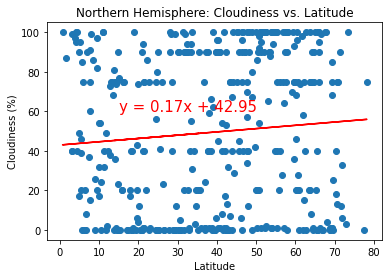

In [20]:
#Add associated y_axis
north_cloud = north['Cloudiness']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_cloud)

# Get regression values
regress_values = north_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(north_lat, north_cloud)
plt.plot(north_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.annotate(lneq,(15,60),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13756861576929696


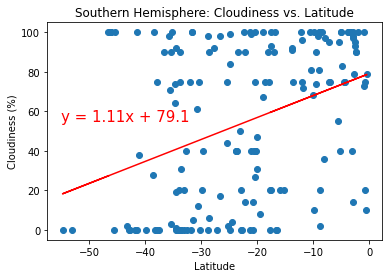

In [16]:
#Add associated y_axis
south_cloud = south['Cloudiness']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_cloud)

# Get regression values
regress_values = south_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(south_lat, south_cloud)
plt.plot(south_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.annotate(lneq,(-55, 55),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

Cloudiness and latitude also have little correlation as noted by the small r value and by the generally even distribution of data points on the plots above.

## Wind Speed vs Latitude Linear Regression

####  Northern Hemisphere - Wind Speed vs. Latitude Linear Regression

The r-value is: 0.010054125731503757


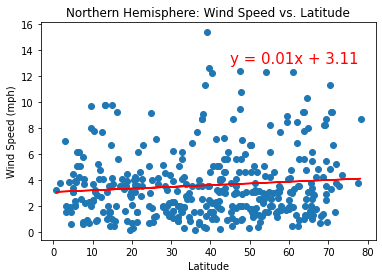

In [17]:
#Add associated y_axis
north_wind = north['Wind Speed']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_wind)

# Get regression values
regress_values = north_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.annotate(lneq,(45,13),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02593922126431013


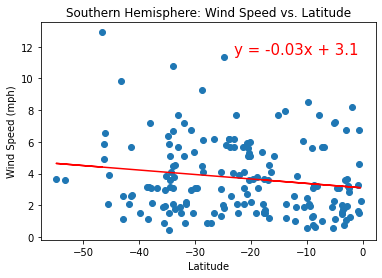

In [18]:
#Add associated y_axis
south_wind = south['Wind Speed']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_wind)

# Get regression values
regress_values = south_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.annotate(lneq,(-23, 11.5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

Wind speed and latitude had the smallest r value meaning they have the lowest correlation. However, it is interesting to note most wind speeds across the globe do not exceed 10 miles per hour. 